<a href="https://colab.research.google.com/github/vTheWise/speech_language_impairment_detection/blob/vs_data_preprocessing/SLID_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

# Installations

In [1]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Modules

In [18]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from sklearn import preprocessing
from google.colab import drive
import glob
from scipy.io import wavfile
import IPython
import pickle

# Global Configurations

## Plots

In [2]:
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["patch.force_edgecolor"] = True

## Constants

In [19]:
hop_length = 512
n_fft = 2048
n_mfcc = 20
auburn_disordered_filename = 'drive/MyDrive/slid_database/auburn_disordered.pkl'
auburn_non_disordered_filename = 'drive/MyDrive/slid_database/auburn_non_disordered.pkl'
cincinnati_disordered_filename = 'drive/MyDrive/slid_database/cincinnati_disordered.pkl'
cincinnati_non_disordered_filename = 'drive/MyDrive/slid_database/cincinnati_non_disordered.pkl'
auburn_disordered_sr_filename = 'drive/MyDrive/slid_database/auburn_disordered_sr.pkl'
auburn_non_disordered_sr_filename = 'drive/MyDrive/slid_database/auburn_non_disordered_sr.pkl'
cincinnati_disordered_sr_filename = 'drive/MyDrive/slid_database/cincinnati_disordered_sr.pkl'
cincinnati_non_disordered_sr_filename = 'drive/MyDrive/slid_database/cincinnati_non_disordered_sr.pkl'
root_path_auburn = "drive/MyDrive/slid_database/Auburn_University_SEED/Children/"
auburn_disordered_path = root_path_auburn+"Child_Disordered_Speech"
auburn_non_disordered_path = root_path_auburn+"Child_Non_Disordered_Speech"
root_path_cincinnati = "drive/MyDrive/slid_database/University_of_Cincinnati_SEED/Children/"
cincinnati_disordered_path = root_path_cincinnati+"Disordered_Speech"
cincinnati_non_disordered_path = root_path_cincinnati+"Non_Disordered_Speech"

# Load data

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
auburn_disordered_data = []
auburn_disordered_sRate = []
auburn_non_disordered_data = []
auburn_non_disordered_sRate = []

In [6]:
cincinnati_disordered_data = []
cincinnati_disordered_sRate = []
cincinnati_non_disordered_data = []
cincinnati_non_disordered_sRate = []

In [7]:
def readAudioData(path):
  audioData = []
  sRate = []
  for root, sub, files in os.walk(path):
      files = sorted(files)
      for f in files:
        if f.lower().endswith(".wav"):
          data, samplerate   =  librosa.load(os.path.join(root, f))
          sRate.append(samplerate)
          audioData.append(data)
  return audioData, sRate

In [10]:
auburn_disordered_data, auburn_disordered_sRate = readAudioData(auburn_disordered_path)

In [11]:
auburn_non_disordered_data, auburn_non_disordered_sRate = readAudioData(auburn_non_disordered_path)

In [12]:
cincinnati_disordered_data, cincinnati_disordered_sRate = readAudioData(cincinnati_disordered_path)

In [13]:
cincinnati_non_disordered_data, cincinnati_non_disordered_sRate = readAudioData(cincinnati_non_disordered_path)

In [14]:
def pickleData(filename, data):
  with open(filename, 'wb') as f:
    pickle.dump(data, f)
    f.close()

In [15]:
pickleData(auburn_disordered_filename, auburn_disordered_data)
pickleData(auburn_non_disordered_filename, auburn_non_disordered_data)
pickleData(cincinnati_disordered_filename, cincinnati_disordered_data)
pickleData(cincinnati_non_disordered_filename, cincinnati_non_disordered_data)

## Read pickled files

In [20]:
def readPickledFile(path):
  data = []
  with open(path, 'rb') as f:
    data = pickle.load(f)
  return data

In [21]:
if not auburn_disordered_data:
  auburn_disordered_data = readPickledFile(auburn_disordered_filename)
  auburn_disordered_sRate = readPickledFile(auburn_disordered_sr_filename)

if not auburn_non_disordered_data:
  auburn_non_disordered_data = readPickledFile(auburn_non_disordered_filename)
  auburn_non_disordered_sRate = readPickledFile(auburn_non_disordered_sr_filename)

if not cincinnati_disordered_data:
  cincinnati_disordered_data = readPickledFile(cincinnati_disordered_filename)
  cincinnati_disordered_sRate = readPickledFile(cincinnati_disordered_sr_filename)

if not cincinnati_non_disordered_data:
  cincinnati_non_disordered_data = readPickledFile(cincinnati_non_disordered_filename)
  cincinnati_non_disordered_sRate = readPickledFile(cincinnati_non_disordered_sr_filename)

# Plots

In [59]:
def plotSampleRate(data, sRate, title):
  librosa.display.waveshow(y = data, sr = sRate, color = "#A300F9")
  plt.title(title)
  plt.tight_layout()
  plt.show()

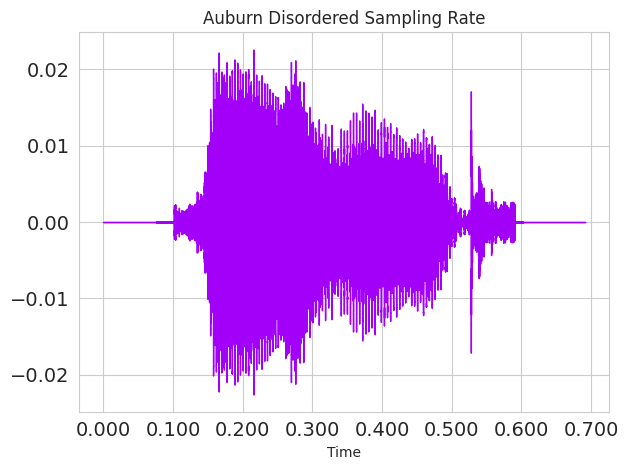

In [60]:
plotSampleRate(auburn_disordered_data[0], auburn_disordered_sRate[0], 'Auburn Disordered Sampling Rate')

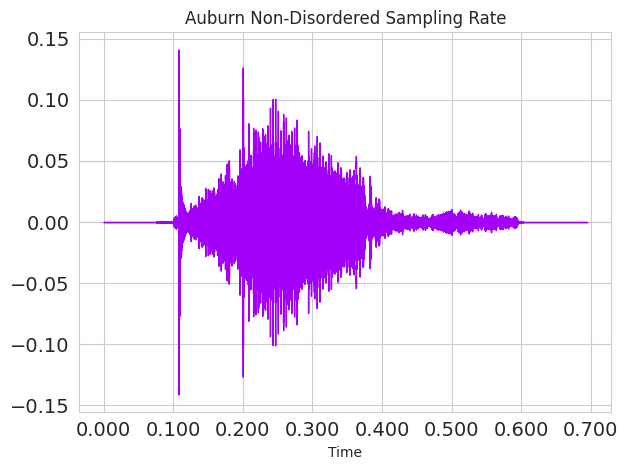

In [62]:
plotSampleRate(auburn_non_disordered_data[1], auburn_non_disordered_sRate[1], 'Auburn Non-Disordered Sampling Rate')

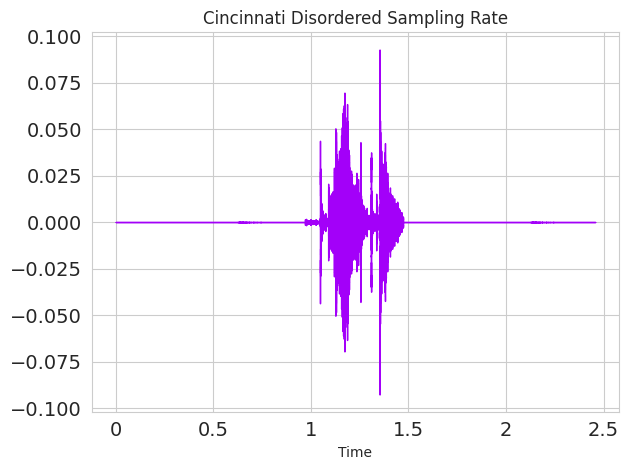

In [63]:
plotSampleRate(cincinnati_disordered_data[0], cincinnati_disordered_sRate[0], 'Cincinnati Disordered Sampling Rate')

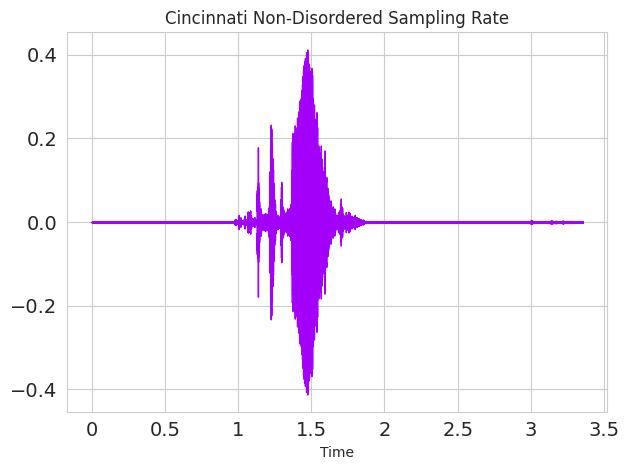

In [64]:
plotSampleRate(cincinnati_non_disordered_data[0], cincinnati_non_disordered_sRate[0], 'Cincinnati Non-Disordered Sampling Rate')

In [73]:
def plotShortTimeFourierTransforms(data, title):
  stft_data = np.abs(librosa.stft(y = data, n_fft = n_fft,hop_length = hop_length))
  plt.plot(stft_data,color = "#A300F9")
  plt.title(title)
  plt.tight_layout()
  plt.show()

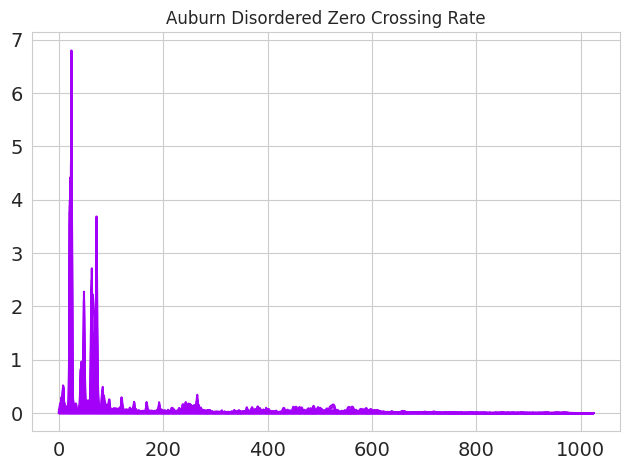

In [74]:
plotShortTimeFourierTransforms(auburn_disordered_data[0], 'Auburn Disordered Zero Crossing Rate')

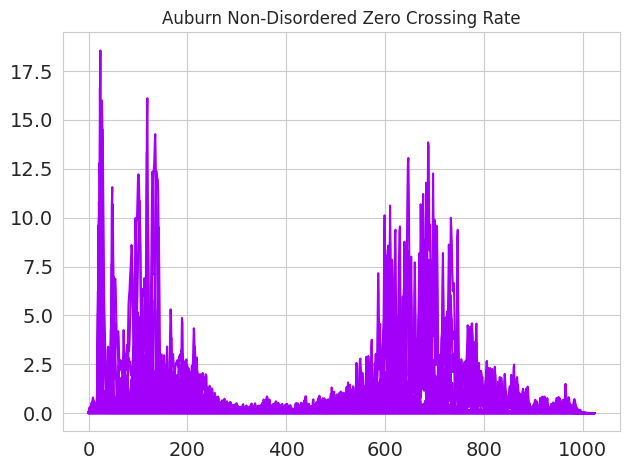

In [75]:
plotShortTimeFourierTransforms(auburn_non_disordered_data[0], 'Auburn Non-Disordered Zero Crossing Rate')

In [76]:
def plotSpectrograms(data, sRate, title):
  stft_data = np.abs(librosa.stft(y = data, n_fft = n_fft,hop_length = hop_length))
  # Convert an amplitude spectrogram to Decibels-scaled spectrogram.
  DB = librosa.amplitude_to_db(stft_data, ref = np.max)
  img = librosa.display.specshow(DB, sr = sRate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
  plt.colorbar(img)
  plt.title(title)
  plt.tight_layout()
  plt.show()

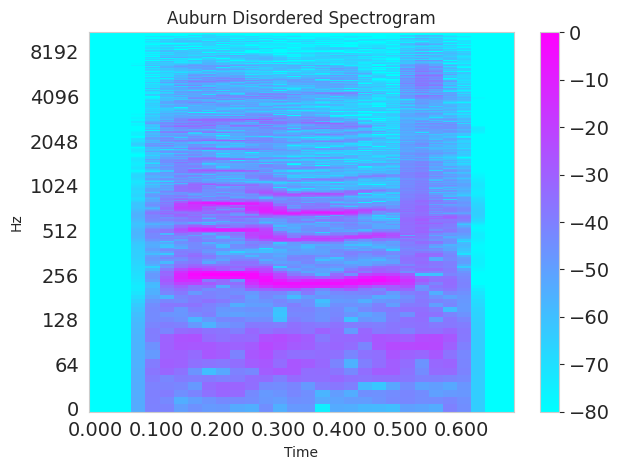

In [79]:
plotSpectrograms(auburn_disordered_data[0], auburn_disordered_sRate[0], 'Auburn Disordered Spectrogram')

# Extract Features

In [29]:
def extract_feature_means(data, sRate):

    # trim leading and trailing silence from an audio signal
    signal, _ = librosa.effects.trim(data)

    # short-time Fourier transform (STFT)
    d_audio = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))

    # spectrogram - convert an amplitude spectrogram to Decibels-scaled spectrogram
    db_audio = librosa.amplitude_to_db(d_audio, ref=np.max)

    # mel spectrograms
    s_audio = librosa.feature.melspectrogram(y=signal, sr=sRate)
    s_db_audio = librosa.amplitude_to_db(s_audio, ref=np.max)

    # perceptrual shock wave represents the sound rhythm and emotion
    y_harm, y_perc = librosa.effects.hpss(signal)

    # spectral centroid - indicates where the ”centre of mass” for a sound is located 
    # calculated as the weighted mean of the frequencies present in the sound
    spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sRate)[0]
    spectral_centroids_delta = librosa.feature.delta(spectral_centroids)
    spectral_centroids_accelerate = librosa.feature.delta(spectral_centroids, order=2)

    # chroma Frequencies - the entire spectrum is projected onto 12 bins 
    # representing the 12 distinct semitones ( or chromas) of the musical octave.
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sRate, hop_length=hop_length)

    # tempo BPM (beats per minute)
    tempo_y, _ = librosa.beat.beat_track(y=signal, sr=sRate)

    # spectral rolloff - a measure of the shape of the signal
    # represents the frequency below which a specified percentage of the total spectral energy (e.g. 85 %) lies
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sRate)[0]

    # spectral flux
    onset_env = librosa.onset.onset_strength(y=signal, sr=sRate)

    # spectral bandwidth - width of the band of light at one-half the peak
    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=signal, sr=sRate)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=signal, sr=sRate, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=signal, sr=sRate, p=4)[0]

    audio_features = {
        "zero_crossing_rate": np.mean(librosa.feature.zero_crossing_rate(signal)[0]),
        "zero_crossings": np.sum(librosa.zero_crossings(signal, pad=False)),
        "spectrogram": np.mean(db_audio[0]),
        "mel_spectrogram": np.mean(s_db_audio[0]),
        "harmonics": np.mean(y_harm),
        "perceptual_shock_wave": np.mean(y_perc),
        "spectral_centroids": np.mean(spectral_centroids),
        "spectral_centroids_delta": np.mean(spectral_centroids_delta),
        "spectral_centroids_accelerate": np.mean(spectral_centroids_accelerate),
        "chroma1": np.mean(chromagram[0]),
        "chroma2": np.mean(chromagram[1]),
        "chroma3": np.mean(chromagram[2]),
        "chroma4": np.mean(chromagram[3]),
        "chroma5": np.mean(chromagram[4]),
        "chroma6": np.mean(chromagram[5]),
        "chroma7": np.mean(chromagram[6]),
        "chroma8": np.mean(chromagram[7]),
        "chroma9": np.mean(chromagram[8]),
        "chroma10": np.mean(chromagram[9]),
        "chroma11": np.mean(chromagram[10]),
        "chroma12": np.mean(chromagram[11]),
        "tempo_bpm": tempo_y,
        "spectral_rolloff": np.mean(spectral_rolloff),
        "spectral_flux": np.mean(onset_env),
        "spectral_bandwidth_2": np.mean(spectral_bandwidth_2),
        "spectral_bandwidth_3": np.mean(spectral_bandwidth_3),
        "spectral_bandwidth_4": np.mean(spectral_bandwidth_4),
    }

    # extract mfcc feature
    mfcc_df = extract_mfcc_feature_means(
                                    signal,
                                    sample_rate=sRate)

    df = pd.DataFrame.from_records(data=[audio_features])

    df = pd.merge(df, mfcc_df, left_index=True, right_index=True)

    return df


def extract_mfcc_feature_means(signal: np.ndarray,
                          sample_rate: int):

    mfcc_alt = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc_alt)
    accelerate = librosa.feature.delta(mfcc_alt, order=2)
    mfcc_features = dict()

    for i in range(0, n_mfcc):

        # mfcc coefficient
        key_name = "".join(['mfcc', str(i)])
        mfcc_value = np.mean(mfcc_alt[i])
        mfcc_features.update({key_name: mfcc_value})

        # mfcc delta coefficient
        key_name = "".join(['mfcc_delta_', str(i)])
        mfcc_value = np.mean(delta[i])
        mfcc_features.update({key_name: mfcc_value})

        # mfcc accelerate coefficient
        key_name = "".join(['mfcc_accelerate_', str(i)])
        mfcc_value = np.mean(accelerate[i])
        mfcc_features.update({key_name: mfcc_value})

    df = pd.DataFrame.from_records(data=[mfcc_features])
    return df

In [39]:
auburn_disordered_features = pd.DataFrame()
for idx, add in enumerate(auburn_disordered_data):
  try:
    tmp_df = extract_feature_means(add, auburn_disordered_sRate[idx])
    auburn_disordered_features = pd.concat([auburn_disordered_features, tmp_df])
  except ValueError:
    continue
pickleData('drive/MyDrive/slid_database/auburn_disordered_features.pkl', auburn_disordered_features)
auburn_disordered_features.to_csv('drive/MyDrive/slid_database/auburn_disordered_features.csv')

In [40]:
auburn_disordered_features

,zero_crossing_rate,zero_crossings,spectrogram,mel_spectrogram,harmonics,perceptual_shock_wave,spectral_centroids,spectral_centroids_delta,spectral_centroids_accelerate,chroma1,...,mfcc_accelerate_16,mfcc17,mfcc_delta_17,mfcc_accelerate_17,mfcc18,mfcc_delta_18,mfcc_accelerate_18,mfcc19,mfcc_delta_19,mfcc_accelerate_19
0,0.069993,950,-52.774269,-76.041183,1.778190e-06,0.000009,1786.423147,11.482482,-57.438845,0.441494,...,0.555363,2.578820,0.195435,-0.075691,-6.715648,-0.028292,0.131187,-4.156456,-0.157603,0.333729
0,0.053451,1314,-63.096680,-76.158081,1.378484e-07,-0.000003,1519.084153,49.909447,24.629903,0.502189,...,0.119205,-0.738070,0.333264,-0.169982,-7.787326,0.189345,0.050798,-3.915537,0.058355,-0.001384
0,0.116349,2356,-62.443741,-77.484131,-3.033452e-09,-0.000004,2247.753305,20.635799,-48.309749,0.488906,...,-0.121911,4.850182,0.149184,-0.182875,-6.920650,0.095894,0.091665,-0.992101,0.308795,-0.205382
0,0.047837,858,-64.469910,-74.053406,3.145976e-08,0.000003,1665.051520,40.987432,38.833676,0.448389,...,0.213615,-4.542630,0.120968,0.068545,-8.081861,0.292590,0.042227,-0.704199,-0.099234,0.060360
0,0.070292,1752,-62.809017,-77.995209,8.760377e-08,0.000007,1765.293596,51.891350,33.999483,0.414158,...,0.212466,-1.450832,-0.221220,0.043132,-6.551493,-0.037398,0.102665,-3.969615,0.125402,0.133891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.117501,2380,-51.163517,-80.000000,-1.179209e-04,-0.000058,2051.914814,69.670552,-6.578489,0.306740,...,0.234420,2.616244,-0.256348,-0.171674,2.266996,-0.307614,-0.148590,-2.467743,-0.079286,-0.179939
0,0.118790,1974,-46.116749,-80.000000,-1.126328e-04,-0.000059,2030.009978,39.256514,26.102450,0.384120,...,0.053204,-4.959867,-0.080620,0.070254,-7.938245,-0.235101,-0.077259,-1.906454,-0.452586,-0.303699
0,0.109741,2510,-48.309391,-80.000000,-1.203122e-04,-0.000058,1981.647963,37.524945,26.075523,0.358568,...,0.096111,-3.627097,-0.310140,-0.124253,-6.519037,-0.020174,0.016256,-5.938496,0.311301,-0.020863
0,0.133986,4284,-53.312477,-80.000000,-1.142417e-04,-0.000067,2438.245476,-1.445830,-17.923914,0.442361,...,-0.423552,-2.407312,-0.263236,-0.420850,-5.227923,-0.293848,-0.194420,-4.291767,0.029590,0.293316


In [ ]:
auburn_non_disordered_features = pd.DataFrame()
for idx, add in enumerate(auburn_non_disordered_data):
  try:
    tmp_df = extract_feature_means(add, auburn_non_disordered_sRate[idx])
    auburn_non_disordered_features = pd.concat([auburn_non_disordered_features, tmp_df])
  except ValueError:
    continue
pickleData('drive/MyDrive/slid_database/auburn_non_disordered_features.pkl', auburn_non_disordered_features)
auburn_non_disordered_features.to_csv('drive/MyDrive/slid_database/auburn_non_disordered_features.csv')

In [44]:
cincinnati_disordered_features = pd.DataFrame()
for idx, add in enumerate(cincinnati_disordered_data):
  try:
    tmp_df = extract_feature_means(add, cincinnati_disordered_sRate[idx])
    cincinnati_disordered_features = pd.concat([cincinnati_disordered_features, tmp_df])
  except ValueError:
    continue
pickleData('drive/MyDrive/slid_database/cincinnati_disordered_features.pkl', cincinnati_disordered_features)
cincinnati_disordered_features.to_csv('drive/MyDrive/slid_database/cincinnati_disordered_features.csv')

In [45]:
cincinnati_non_disordered_features = pd.DataFrame()
for idx, add in enumerate(cincinnati_non_disordered_data):
  try:
    tmp_df = extract_feature_means(add, cincinnati_non_disordered_sRate[idx])
    cincinnati_non_disordered_features = pd.concat([cincinnati_non_disordered_features, tmp_df])
  except ValueError:
    continue
pickleData('drive/MyDrive/slid_database/cincinnati_non_disordered_features.pkl', cincinnati_non_disordered_features)
cincinnati_non_disordered_features.to_csv('drive/MyDrive/slid_database/cincinnati_non_disordered_features.csv')